In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
path = r'/Users/polinarozhkova/Desktop/GitHub/cr_eda_chicago/'
final_merge_df = pd.read_csv(os.path.join(path, 'clean_data/merge_all.csv'))
cr_reports = pd.read_excel(os.path.join(path, 'inputs/CR_from_CPD_Annual_Reports_copy.xlsx'))
foia_df = 'inputs/FOIA_2019_to_2021_Clearance_Rates_Shooting_Homicides.xlsx'
foia_hom = pd.read_excel((os.path.join(path, foia_df)), sheet_name=2)

In [7]:
cr_reports

,source,year,homicide_count,total_cleared,clearance_rate,firearm
0,CPD Annual Report for 2001,2000,631,335.0,0.530903,471
1,CPD Annual Report for 2001,2001,666,361.0,0.542042,514
2,CPD Annual Report for 2002,2002,648,301.0,0.464506,513
3,CPD Annual Report for 2003,2003,600,304.0,0.506667,485
4,CPD Annual Report for 2004,2004,448,234.0,0.522321,337
5,CPD Annual Report for 2005,2005,448,195.0,0.435268,339
6,CPD Annual Report for 2006,2006,467,181.0,0.387580,385
7,CPD Annual Report for 2007,2007,442,175.0,0.395928,325
8,CPD Annual Report for 2008,2008,510,181.0,0.354902,412
9,CPD Annual Report for 2009,2009,461,160.0,0.347072,376


In [ ]:
all_cleared_df = final_merge_df[final_merge_df['cleared'] == 'Y']

In [ ]:
foia_hom['year_clear'] = foia_hom['DATE CLEARED'].dt.year
foia_hom['year'] = foia_hom['INJURY DATE'].dt.year

hom_year_df = pd.DataFrame(
    foia_hom.groupby(['year_clear', 'year', 'CLEARED'])['RD'].count()).reset_index()

clear_year_df = pd.DataFrame(
    foia_hom.groupby(['year_clear', 'CLEARED'])['RD'].count()).reset_index()

except_clear_year = pd.DataFrame(
    foia_hom.groupby(['year_clear', 'CLEARED', 'CLEARED EXCEPTIONALLY'])
    ['RD'].count()).reset_index()

### Plot 1

In [7]:
yr_month_map = pd.DataFrame(final_merge_df.groupby(['year', 'month'])
                            ['case_number'].count()).reset_index()
yr_month_map = yr_month_map.rename(
    columns={'case_number': 'homicides'}).pivot('year', 'month', 'homicides')

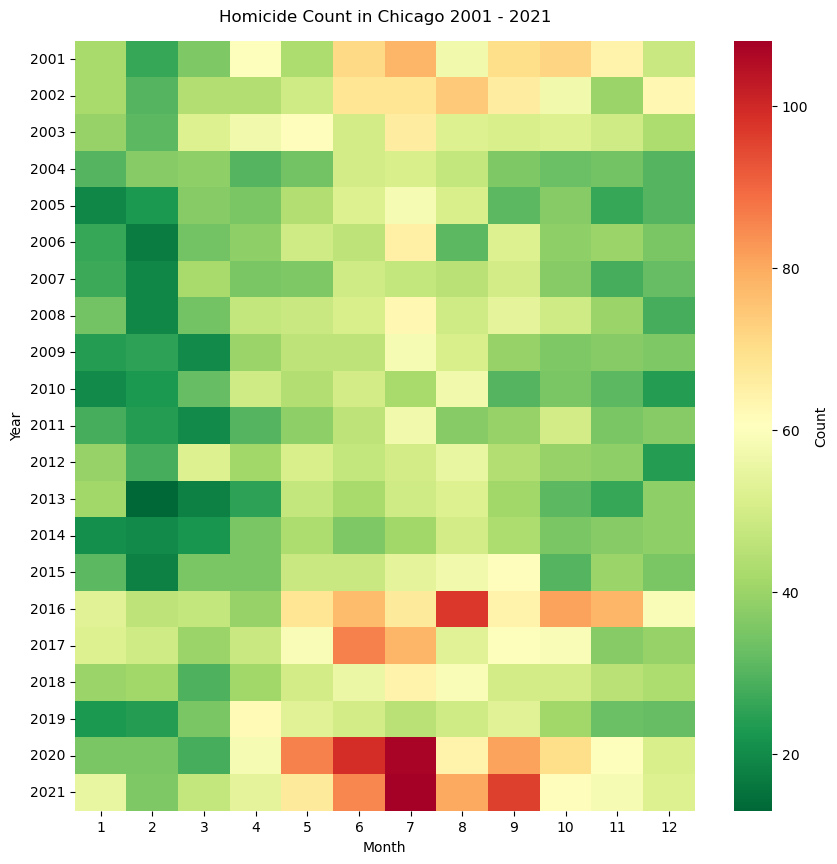

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(yr_month_map, cmap='RdYlGn_r',
            cbar_kws={'label': 'Count'})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
plt.title('Homicide Count in Chicago 2001 - 2021', fontdict={'fontsize': 12}, pad=14)
plt.savefig(os.path.join(path, 'plots/static_plot_1.png'))

### Time to Clearance

In [ ]:
all_cleared_df['time_to_clear'].describe()

In [ ]:
all_cleared_df['time_to_clear'].sort_values()

Dropping incidents that were cleared immediately and likely administrative error of -17 days: 

In [ ]:
all_cleared_df = all_cleared_df[all_cleared_df['time_to_clear'] > 0]

In [ ]:
sns.histplot(data=all_cleared_df, x='time_to_clear', stat='count', bins='auto', cumulative=False)

In [ ]:
cleared_fem = all_cleared_df[all_cleared_df['sex'] == 'F']
cleared_fem

### Plot 2

In [ ]:
sns.barplot(x = “species”, y = “flipper_length_mm”, 
            data = data, hue = “sex”)

In [ ]:
# all homicides and clearances
total_hom_yr = pd.DataFrame(final_merge_df.groupby(['year'])['case_number'].count()).reset_index()
clr_yr = pd.DataFrame(all_cleared_df.groupby(['year'])['case_number'].count()).reset_index()
total_commit_cleared = pd.merge(clr_yr, total_hom_yr, on=['year']).rename(
    columns={'case_number_y': 'hom_total', 'case_number_x': 'clear_total'})

In [ ]:
# firearm homicides and firearm clearances
firearm = pd.DataFrame(final_merge_df.groupby(['year'])['gunshot_injury_i'].
                       apply(lambda x: (x == 'YES').sum())).reset_index()
firearm_clr = pd.DataFrame(all_cleared_df.groupby(['year'])['gunshot_injury_i'].
                           apply(lambda x: (x == 'YES').sum())).reset_index()
total_firearm = pd.merge(firearm, firearm_clr, on=['year']).rename(
    columns={'gunshot_injury_i_x': 'firearm_total', 'gunshot_injury_i_y': 'firearm_clear'})

In [ ]:
dv = pd.DataFrame(final_merge_df.groupby(['year'])['domestic'].
                  apply(lambda x: (x == True).sum())).reset_index()
dv_clr = pd.DataFrame(all_cleared_df.groupby(['year'])['domestic'].
                      apply(lambda x: (x == True).sum())).reset_index()
total_dv = pd.merge(dv, dv_clr, on=['year']).rename(
    columns={'domestic_x': 'dv_total', 'domestic_y': 'dv_clear'})

In [ ]:
total_commit_cleared = pd.melt(total_commit_cleared, id_vars=['year'],
                               value_vars=['hom_total', 'clear_total'],
                               var_name='case_status', value_name='Count')

In [ ]:
total_firearm = pd.melt(total_firearm, id_vars=['year'],
                        value_vars=['firearm_total', 'firearm_clear'],
                        var_name='case_status', value_name='Count')

In [ ]:
total_dv = pd.melt(total_dv, id_vars=['year'], value_vars=['dv_total', 'dv_clear'],
                   var_name='case_status', value_name='Count')

In [ ]:
def line_subplots(df, ax_n):
    plt.rcParams.update({'font.size': 9})
    sns.set_style("darkgrid")
    sns.lineplot(data=df, x='year', y='Count',
                 hue='case_status', ax=ax_n, linewidth=0.75, palette=['#34495e', '#3498db'])
    ax_n.legend(loc='best')
    ax_n.set_xlabel('Year')
    ax_n.set_ylabel('Count')
    ax_n.set_xticks(range(2001, 2022))
    return

In [ ]:
def plot_annotate(ax_n, y1, y2, y3):
    style = dict(size=10, color='red', alpha=0.75)
    ax_n.axvline(2001, linestyle='dashed', color='red', alpha=0.25)
    ax_n.axvline(2008, linestyle='dashed', color='red', alpha=0.25)
    ax_n.axvline(2020, linestyle='dashed', color='red', alpha=0.25)
    ax_n.text(2001, y1, '  9/11 Attack', ha='left',  **style)
    ax_n.text(2008, y2, 'Financial Crisis Starts  ', ha='right',  **style)
    ax_n.text(2020, y3, 'Covid-19 Lockdown  ', ha='right',  **style)
    return

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
ax1, ax2, ax3 = axes.flatten()
line_subplots(total_commit_cleared, ax1)
line_subplots(total_firearm, ax2)
line_subplots(total_dv, ax3)
plot_annotate(ax1, 750, 650, 750)
plot_annotate(ax2, 700, 600, 700)
plot_annotate(ax3, 56, 52, 56)
ax1.set_title('Total Homicides')
ax2.set_title('Homicides Involving Firearms')
ax3.set_title('Domestic Violence Homicides')
plt.savefig(os.path.join(path, 'plots/static_plot_2.png'))

Sources:
For heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html;
https://regenerativetoday.com/time-series-data-visualization-in-python/,
For annotations:
https://jessica-miles.medium.com/adding-annotations-to-visualizations-using-matplotlib-279e9c770baa
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html